## FEATURE EXTRACTION

In [ ]:
# Create the data frames and save them if needed (BEWARE: this will overwrite the existing files and the process can take up to 2 hours)
import pandas as pd
import warnings
import numpy as np
from CreateTable import create_df
warnings.filterwarnings('ignore')
df1 = create_df("Dataset/DamasconeA/data2/*_CPXE_*.csv", offset=(49, 51), angle=1)
df2 = create_df("Dataset/DamasconeA/data1/*_CPXE_*.csv")
df3 = create_df("Dataset/DamasconeB/together/*_CPXE_*.csv")

# Convert None to np.nan
df1 = df1.replace({None: np.nan})
df2 = df2.replace({None: np.nan})
df3 = df3.replace({None: np.nan})

df1.to_pickle("Dataset/DamasconeA2.pkl")
df2.to_pickle("Dataset/DamasconeA.pkl")
df3.to_pickle("Dataset/DamasconeB.pkl")

In [ ]:
import pickle
import pandas as pd

data_train = pd.read_pickle("Dataset/DamasconeA2.pkl")
data_validation = pd.read_pickle("Dataset/DamasconeA.pkl")
data_test = pd.read_pickle("Dataset/DamasconeB.pkl")

In [ ]:
import numpy as np

data_train['stiffness_to_relaxation'] = data_train['Stiffness'] / data_train['force_relaxation']
data_train['oscillation_to_max_force'] = data_train['force_oscillation'] / data_train['force_max']
data_train['strain_energy_density'] = data_train.apply(
    lambda row: row['energy_input'] / (np.max(row['Pi']) - np.min(row['Pi']))
    if len(row['Pi']) > 0 else np.nan,
    axis=1
)
data_train['energy_dissipation_ratio'] = data_train['hysteresis_area'] / data_train['energy_input']

data_test['stiffness_to_relaxation'] = data_test['Stiffness'] / data_test['force_relaxation']
data_test['oscillation_to_max_force'] = data_test['force_oscillation'] / data_test['force_max']
data_test['strain_energy_density'] = data_test.apply(
    lambda row: row['energy_input'] / (np.max(row['Pi']) - np.min(row['Pi']))
    if len(row['Pi']) > 0 else np.nan,
    axis=1
)
data_test['energy_dissipation_ratio'] = data_test['hysteresis_area'] / data_test['energy_input']

data_validation['stiffness_to_relaxation'] = data_validation['Stiffness'] / data_validation['force_relaxation']
data_validation['oscillation_to_max_force'] = data_validation['force_oscillation'] / data_validation['force_max']
data_validation['strain_energy_density'] = data_validation.apply(
    lambda row: row['energy_input'] / (np.max(row['Pi']) - np.min(row['Pi']))
    if len(row['Pi']) > 0 else np.nan,
    axis=1
)
data_validation['energy_dissipation_ratio'] = data_validation['hysteresis_area'] / data_validation['energy_input']


In [ ]:
data_train = data_train.dropna()
data_test = data_test.dropna()
data_validation = data_validation.dropna()

In [ ]:
from helper import feature_list2, feature_list_all

to_remove = ['poly3_coef0', 'poly3_coef1', 'poly3_coef2', 'poly3_coef3',
             'poly4_coef0', 'poly4_coef1', 'poly4_coef2', 'poly4_coef3', 'poly4_coef4',
             'poly5_coef0', 'poly5_coef1', 'poly5_coef2', 'poly5_coef3', 'poly5_coef4',
             # Segmentation features
             'segment2_slope', 'segment3_slope', 'segment2_force_std', 'segment3_force_std',
             'segment2_skew', 'segment3_skew']
#feature_list_3 = feature_list = [x for x in feature_list2 + ['stiffness_to_relaxation', 'oscillation_to_max_force'] if x not in to_remove]

feature_list = feature_list_all
to_see = [
     # Local stiffness anomaly features
    'local_stiffness_w3', 'local_stiffness_w5', 'local_stiffness_w7',
    'local_stiffness_zscore_w3', 'local_stiffness_zscore_w5', 'local_stiffness_zscore_w7',

    # Spatial pattern features
    'stiffness_harris_response', 'stiffness_edge_response',

    # Surface curvature features
    'surface_mean_curvature', 'surface_gaussian_curvature', 'surface_type',

    # Morphological features (for each threshold)
    'morph_area_mean_t0', 'morph_area_mean_t1', 'morph_area_mean_t2', 'morph_area_mean_t3',
    'morph_area_std_t0', 'morph_area_std_t1', 'morph_area_std_t2', 'morph_area_std_t3',
    'morph_perimeter_mean_t0', 'morph_perimeter_mean_t1', 'morph_perimeter_mean_t2', 'morph_perimeter_mean_t3',
    'morph_perimeter_std_t0', 'morph_perimeter_std_t1', 'morph_perimeter_std_t2', 'morph_perimeter_std_t3',
    'morph_euler_mean_t0', 'morph_euler_mean_t1', 'morph_euler_mean_t2', 'morph_euler_mean_t3',
    'morph_active_ratio_t0', 'morph_active_ratio_t1', 'morph_active_ratio_t2', 'morph_active_ratio_t3',
    'morph_border_touch_ratio_t0', 'morph_border_touch_ratio_t1', 'morph_border_touch_ratio_t2', 'morph_border_touch_ratio_t3',

    # Position context features
    'dist_to_grid_edge', 'is_grid_corner',
]

# feature_list = feature_list_3
# feature_list = ['loading_unloading_area_ratio', 'peak_width', 'stiffness_to_relaxation', 'Stiffness']
# feature_list = ["Stiffness", "Upstroke", "Downstroke", "P_ss"] #, "P_ss", "loading_energy"]peak_position

# feature_list = ['poly4_coef4', 'poly4_coef3', 'poly5_coef0', 'loading_unloading_area_ratio', 'Stiffness', 'quartic_coefficient', 'Upstroke']

### VISUALIZATION OF FEATURE

In [ ]:
from plotter import plot_features_singledf
print("DATA TRAIN")
plot_features_singledf(data_train, feature_list=to_see)

In [ ]:
print("DATA VALIDATION")
plot_features_singledf(data_validation, feature_list=to_see)

In [ ]:
print("DATA TEST")
plot_features_singledf(data_test, feature_list=to_see)

### SPATIAL SMOOTHING

In [18]:
from scipy.interpolate import NearestNDInterpolator
from scipy.ndimage import median_filter, gaussian_filter
from helper import *

smoothing_config = {
    'Entropy': 'gaussian',
}  # Dictionary 'feature-name' : type of smoothing (set if you want to test other method of smoothing instead of median)


def apply_smoothing(grid_z, method='median'):
    if method == 'median':
        return median_filter(grid_z, size=3, mode='reflect')
    elif method == 'gaussian':
        return gaussian_filter(grid_z, sigma=2)
    elif method == 'diffusion':
        # Simple anisotropic diffusion
        def diffusion_step(img, kappa=50):
            # Compute image gradients
            dy, dx = np.gradient(img)

            # Compute diffusion coefficients
            diff_coef_x = 1 / (1 + (dx / kappa) ** 2)
            diff_coef_y = 1 / (1 + (dy / kappa) ** 2)

            # Compute diffusion
            diff_x = np.zeros_like(img)
            diff_y = np.zeros_like(img)

            diff_x[1:-1, 1:-1] = diff_coef_x[1:-1, 1:-1] * (img[1:-1, 2:] - img[1:-1, 1:-1])
            diff_y[1:-1, 1:-1] = diff_coef_y[1:-1, 1:-1] * (img[2:, 1:-1] - img[1:-1, 1:-1])

            return img + 0.25 * (diff_x + diff_y)

        # Apply multiple diffusion steps
        iterations = 20
        img = grid_z.copy()
        for i in range(iterations):
            img = diffusion_step(img)
        return img

    else:
        raise ValueError(f"Smoothing method not implemented: {method}")


def get_grid_bounds(df):
    x_min, x_max = int(df["posx"].min()), int(df["posx"].max())
    y_min, y_max = int(df["posy"].min()), int(df["posy"].max())
    grid_shape = (y_max - y_min + 1, x_max - x_min + 1)
    return x_min, y_min, grid_shape


# Smoothing function for a single dataframe
def smooth_subset(subset_df, x_min, y_min, grid_shape):

    smoothed_data = {}

    for feature in feature_list:
        # Initialize the grid with NaN values
        grid_z = np.full(grid_shape, np.nan, dtype=np.float32)

        # Map the feature values to the grid
        for _, row in subset_df.iterrows():
            x_idx = int(row["posx"]) - x_min
            y_idx = int(row["posy"]) - y_min
            grid_z[y_idx, x_idx] = row[feature]

        # Interpolate NaN values
        yy, xx = np.indices(grid_z.shape)
        valid_mask = ~np.isnan(grid_z)

        if np.any(~valid_mask):
            interpolator = NearestNDInterpolator(
                np.column_stack((yy[valid_mask], xx[valid_mask])),
                grid_z[valid_mask]
            )
            grid_z = interpolator(yy, xx)

        # Smooth the grid
        method = smoothing_config.get(feature, 'median')
        grid_z = apply_smoothing(grid_z, method=method)

        # Store the smoothed values back in the DataFrame
        smoothed_data[feature] = [
            grid_z[int(row["posy"]) - y_min, int(row["posx"]) - x_min]
            for _, row in subset_df.iterrows()
        ]

    # Create a new DataFrame with the smoothed data
    smoothed_subset = pd.DataFrame(smoothed_data, index=subset_df.index)

    # Add the original label and position columns
    smoothed_subset[['label', 'posx', 'posy']] = subset_df[['label', 'posx', 'posy']]

    return smoothed_subset


if smoothing_config is None:
    smoothing_config = {feature: 'median' for feature in feature_list}

# Compute grid bounds and smooth each subset
test_x_min, test_y_min, test_grid_shape = get_grid_bounds(data_test)
train_x_min, train_y_min, train_grid_shape = get_grid_bounds(data_train)
val_x_min, val_y_min, val_grid_shape = get_grid_bounds(data_validation)

# Smooth each subset SEPARATELY
smoothed_test = smooth_subset(data_test, test_x_min, test_y_min, test_grid_shape)
smoothed_train = smooth_subset(data_train, train_x_min, train_y_min, train_grid_shape)
smoothed_validation = smooth_subset(data_validation, val_x_min, val_y_min, val_grid_shape)

smoothed_df = pd.concat([smoothed_test, smoothed_train],ignore_index=True)  # For visualization in the next sections only

## DB SPLITTING

### Binary Classifier

Class distribution in the dataset:
Label 0: 4608 samples (35.13%)
Label 1: 395 samples (3.01%)
Label 2: 391 samples (2.98%)
Label 3: 378 samples (2.88%)
Label 4: 391 samples (2.98%)
Label 5: 396 samples (3.02%)
Class distribution in the dataset:
Label 0: 4613 samples (35.17%)
Label 1: 388 samples (2.96%)
Label 2: 388 samples (2.96%)
Label 3: 392 samples (2.99%)
Label 4: 388 samples (2.96%)
Label 5: 388 samples (2.96%)


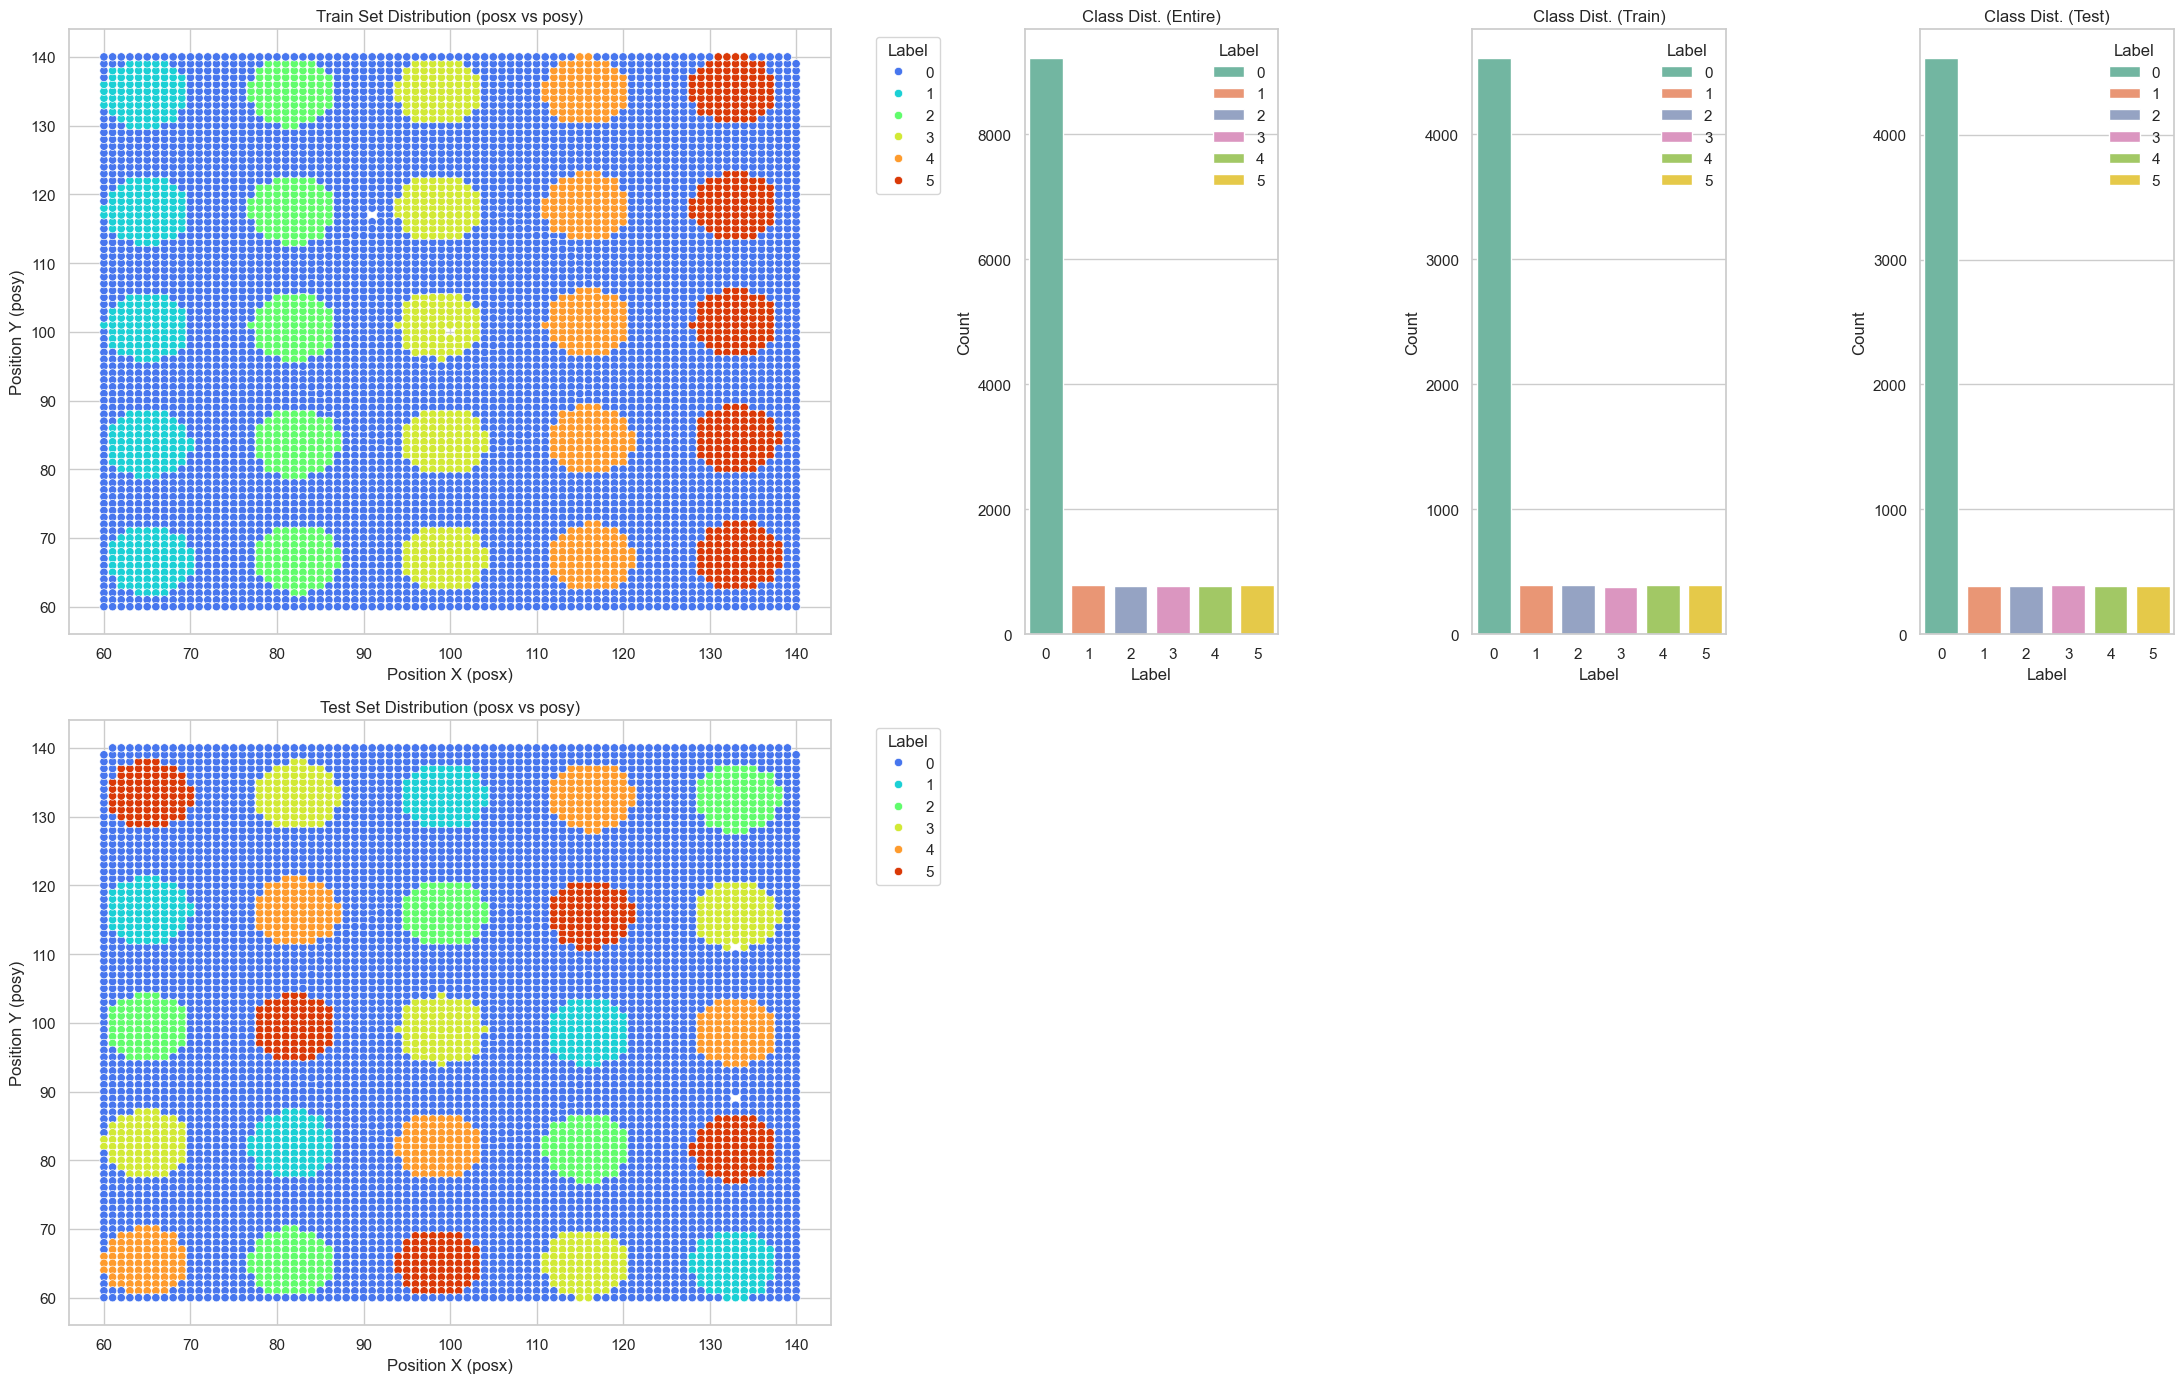

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score
from imblearn.over_sampling import ADASYN
import warnings
from sklearn.exceptions import UndefinedMetricWarning
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

# Display class distribution
X = smoothed_df[feature_list + ["posx", "posy"]]
y = smoothed_df['label']

# train_df = pd.concat([train_df1, train_df2], ignore_index=True)
# smoothed_train = pd.concat([smoothed_train1, smoothed_train2], ignore_index=True)

# Training distribution:
class_distribution = Counter(smoothed_train['label'])
print("Class distribution in the dataset:")
for label, count in sorted(class_distribution.items()):
    print(f"Label {label}: {count} samples ({count / len(y) * 100:.2f}%)")

# Test distribution:
class_distribution = Counter(smoothed_test['label'])
print("Class distribution in the dataset:")
for label, count in sorted(class_distribution.items()):
    print(f"Label {label}: {count} samples ({count / len(y) * 100:.2f}%)")

# Prepare data for classification
X_train = smoothed_train[feature_list + ["posx", "posy"]]
y_train = smoothed_train['label']

X_test = smoothed_test[feature_list + ["posx", "posy"]]
y_test = smoothed_test['label']

X_validation = smoothed_validation[feature_list + ["posx", "posy"]]
y_validation = smoothed_validation['label']

# Create the figure and axes: 2 rows (train/test), then 3 histograms
fig, axs = plt.subplots(2, 4, figsize=(22, 14), gridspec_kw={'width_ratios': [3, 1, 1, 1]})

# Set style
sns.set(style="whitegrid")

# Create consistent color map using turbo
unique_labels = sorted(data_train['label'].unique())  # or union of train + test if needed
palette_colors = sns.color_palette("turbo", n_colors=len(unique_labels))
label_color_dict = {label: color for label, color in zip(unique_labels, palette_colors)}

# Plot train
sns.scatterplot(
    data=data_train,
    x='posx',
    y='posy',
    hue='label',
    palette=label_color_dict,  # Use fixed mapping
    ax=axs[0, 0]
)
axs[0, 0].set_title("Train Set Distribution (posx vs posy)")
axs[0, 0].set_xlabel("Position X (posx)")
axs[0, 0].set_ylabel("Position Y (posy)")
axs[0, 0].legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot test with same label-color mapping
sns.scatterplot(
    data=data_test,
    x='posx',
    y='posy',
    hue='label',
    palette=label_color_dict,  # Same dictionary ensures color consistency
    ax=axs[1, 0]
)
axs[1, 0].set_title("Test Set Distribution (posx vs posy)")
axs[1, 0].set_xlabel("Position X (posx)")
axs[1, 0].set_ylabel("Position Y (posy)")
axs[1, 0].legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Histograms / Class Distribution Plots ---
plot_class_distribution(smoothed_df['label'], axs[0, 1], "Class Dist. (Entire)")
plot_class_distribution(y_train, axs[0, 2], "Class Dist. (Train)")
plot_class_distribution(y_test, axs[0, 3], "Class Dist. (Test)")

# Hide the unused bottom row histograms
for ax in axs[1, 1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# # Drop posx and posy columns from the training and testing sets after plotting
# X_train = X_train.drop(columns=['posx', 'posy'])
# X_test = X_test.drop(columns=['posx', 'posy'])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler_train1 = StandardScaler()
scaler_train2 = StandardScaler()
scaler_test = StandardScaler()

X_train_selected = X_train[feature_list]
X_test_selected = X_test[feature_list]
X_validation_selected = X_validation[feature_list]

# X_train_selected_1 = X_train_selected[X_train["posy"] <= 140]
# X_train_selected_2 = X_train_selected[X_train["posy"] > 140]

X_train_scaled = scaler_train1.fit_transform(X_train_selected)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_list, index=X_train_selected.index)

X_validation_scaled = scaler_train1.fit_transform(X_validation_selected)
X_validation_scaled = pd.DataFrame(X_validation_scaled, columns=feature_list, index=X_validation_selected.index)

# X_train_scaled2 = scaler_train2.fit_transform(X_train_selected_2)

# X_train_scaled1 = pd.DataFrame(X_train_scaled1, columns=feature_list, index=X_train_selected_1.index)
# X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=feature_list, index=X_train_selected_2.index)
# X_train_scaled = pd.concat([X_train_scaled1, X_train_scaled2]).sort_index()

X_test_scaled = scaler_test.fit_transform(X_test_selected)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_list, index=X_test_selected.index)

ValueError: Shape of passed values is (6559, 288), indices imply (6559, 286)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance, ks_2samp
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import pairwise_distances
import warnings

warnings.filterwarnings('ignore')


def calculate_mutual_info(X_data, y_data, feature_list, random_state=42):
    """Calculate mutual information scores for features."""
    return mutual_info_classif(X_data[feature_list], y_data, random_state=random_state)


def calculate_wasserstein_distances(train_data, validation_data, feature_list):
    """Calculate Wasserstein distance between train and validation for each feature."""
    distances = []

    for feature in feature_list:
        distance = wasserstein_distance(train_data[feature], validation_data[feature])
        distances.append({'feature': feature, 'wasserstein_distance': distance})

    return pd.DataFrame(distances)


def calculate_distribution_metrics(train_data, validation_data, feature_list):
    """Calculate distribution metrics between train and validation sets."""
    metrics = []

    for feature in feature_list:
        # Wasserstein distance (Earth Mover's Distance)
        w_distance = wasserstein_distance(train_data[feature], validation_data[feature])

        # Kolmogorov-Smirnov test
        ks_stat, ks_pval = ks_2samp(train_data[feature], validation_data[feature])

        metrics.append({
            'feature': feature,
            'wasserstein_distance': w_distance,
            'ks_statistic': ks_stat,
            'ks_pvalue': ks_pval
        })

    return pd.DataFrame(metrics)


def calculate_class_distribution_metrics(X_train, y_train, X_validation, y_validation, feature_list, selected_classes):
    """Calculate distribution metrics for each selected class."""
    class_metrics = {}

    for cls in selected_classes:
        # Filter data for this class
        X_train_cls = X_train[y_train == cls]
        X_val_cls = X_validation[y_validation == cls]

        # Calculate metrics for this class
        metrics_df = calculate_distribution_metrics(X_train_cls, X_val_cls, feature_list)
        class_metrics[cls] = metrics_df

    return class_metrics


def plot_feature_importance(mi_df, metrics_df, figsize=(24, 12)):
    """Plot mutual information and distribution metrics for features."""
    fig, axes = plt.subplots(2, 2, figsize=figsize)

    # Ensure both dataframes have the same feature ordering
    mi_df = mi_df.sort_values('smoothed', ascending=False)

    # Merge to maintain the same order
    merged_df = mi_df[['feature']].merge(metrics_df, on='feature')

    # Plot Mutual Information
    sns.barplot(x='smoothed', y='feature', data=mi_df.head(15),
                color='blue', alpha=0.7, ax=axes[0, 0])
    sns.barplot(x='test', y='feature', data=mi_df.head(15),
                color='green', alpha=0.7, ax=axes[0, 1])

    axes[0, 0].set_title('Mutual Information (Train)', fontsize=14)
    axes[0, 1].set_title('Mutual Information (Validation)', fontsize=14)

    # Plot Wasserstein Distance only
    sns.barplot(x='wasserstein_distance', y='feature', data=merged_df.head(15),
                palette='mako', ax=axes[1, 0])
    axes[1, 0].set_title('Wasserstein Distance (Train vs Validation)', fontsize=14)

    # Turn off the unused subplot
    axes[1, 1].axis('off')

    plt.tight_layout()
    return fig


def visualize_feature_distributions(X_train, y_train, X_validation, y_validation,
                                    selected_features, selected_classes):
    figsize = (3 * len(selected_classes), 3 * len(selected_features))
    fig, axes = plt.subplots(len(selected_features), len(selected_classes), figsize=figsize)

    for i, feature in enumerate(selected_features):
        for j, cls in enumerate(selected_classes):
            ax = axes[i, j] if len(selected_features) > 1 else axes[j]

            # Filter data for the class
            train_data = X_train[y_train == cls][feature]
            val_data = X_validation[y_validation == cls][feature]

            # Plot distributions
            sns.histplot(train_data, kde=True, color='blue', alpha=0.5,
                         ax=ax, label='Train', stat='density')
            sns.histplot(val_data, kde=True, color='green', alpha=0.5,
                         ax=ax, label='Validation', stat='density')

            # Calculate Wasserstein distance for this feature and class
            w_dist = wasserstein_distance(train_data, val_data)

            ax.set_title(f"Class {cls}, Feature: {feature}\nWasserstein = {w_dist:.4f}", fontsize=10)

            if i == 0:
                ax.legend()

            if i == len(selected_features) - 1:
                ax.set_xlabel(feature)
            else:
                ax.set_xlabel('')

            if j == 0:
                ax.set_ylabel('Density')
            else:
                ax.set_ylabel('')

    plt.tight_layout()
    return fig


def select_features_advanced(mi_df, metrics_df, class_metrics, selected_classes,
                             mi_threshold=0.5, wasserstein_threshold=0.12,
                             class_wasserstein_threshold=None):
    """
    Select features based on multiple criteria:
    1. High mutual information in both train and validation
    2. Low overall distribution distances between train and validation
    3. Low per-class distribution distances
    """
    # Step 1: Filter by mutual information
    mi_selected = mi_df[(mi_df['smoothed'] > mi_threshold) &
                        (mi_df['test'] > mi_threshold)]

    # Step 2: Filter by overall distribution metrics
    dist_selected = metrics_df[metrics_df['wasserstein_distance'] < wasserstein_threshold]

    # Combine the filters
    combined = mi_selected[['feature']].merge(dist_selected[['feature']], on='feature')
    combined_features = combined['feature'].tolist()

    # Step 3: Filter by per-class distribution metrics
    if class_wasserstein_threshold is not None:
        final_features = []
        for feature in combined_features:
            ok = True
            for cls in selected_classes:
                cls_df = class_metrics[cls]
                w_dist = cls_df.loc[cls_df['feature'] == feature, 'wasserstein_distance'].values[0]
                if w_dist > class_wasserstein_threshold:
                    ok = False
                    break
            if ok:
                final_features.append(feature)
    else:
        final_features = combined_features

    return final_features


def find_best_features(X_train_scaled, y_train, X_validation_scaled, y_validation, feature_list,
                       selected_classes, mi_threshold=0.5, wasserstein_threshold=0.1,
                       class_wasserstein_threshold=None, plot=False):
    """Enhanced main function to perform feature selection analysis with per-class threshold."""
    # Filter data for selected classes
    train_mask = y_train.isin(selected_classes)
    X_train_filtered = X_train_scaled[train_mask]
    y_train_filtered = y_train[train_mask]

    test_mask = y_validation.isin(selected_classes)
    X_val_filtered = X_validation_scaled[test_mask]
    y_val_filtered = y_validation[test_mask]

    # Calculate mutual information for train and validation sets
    mi_scores_train = calculate_mutual_info(X_train_filtered, y_train_filtered, feature_list)
    mi_scores_val = calculate_mutual_info(X_val_filtered, y_val_filtered, feature_list)

    mi_df = pd.DataFrame({
        'feature': feature_list,
        'smoothed': mi_scores_train,
        'test': mi_scores_val,
    })

    # Calculate overall distribution metrics
    metrics_df = calculate_distribution_metrics(X_train_filtered, X_val_filtered, feature_list)

    # Calculate class-specific distribution metrics
    class_metrics = calculate_class_distribution_metrics(
        X_train_filtered, y_train_filtered,
        X_val_filtered, y_val_filtered,
        feature_list, selected_classes
    )

    # Select features based on enhanced criteria
    selected_features = select_features_advanced(
        mi_df, metrics_df, class_metrics, selected_classes,
        mi_threshold, wasserstein_threshold,
        class_wasserstein_threshold
    )

    if plot:
        print("Plotting overall feature importance...")
        plot_feature_importance(mi_df, metrics_df)
        plt.show()

        if len(selected_features) > 0:
            visualize_feature_distributions(
                X_train_filtered, y_train_filtered,
                X_val_filtered, y_val_filtered,
                selected_features, selected_classes
            )
            plt.show()

        print(f"\n Selected Features ({len(selected_features)}):")
        print(f"  - MI threshold: {mi_threshold}")
        print(f"  - Wasserstein threshold: {wasserstein_threshold}")
        if class_wasserstein_threshold is not None:
            print(f"  - Per-class Wasserstein threshold: {class_wasserstein_threshold}")

        if len(selected_features) > 0:
            for i, feature in enumerate(selected_features, 1):
                print(f"  {i}. {feature}")
        else:
            print("  No features met all criteria. Consider relaxing thresholds.")

    return selected_features


selected_features = find_best_features(
    X_train_scaled=X_train_scaled,
    y_train=y_train,
    X_validation_scaled=X_validation_scaled,
    y_validation=y_validation,
    feature_list=feature_list,
    selected_classes=[2, 3, 4, 5],
    mi_threshold=0.3,
    wasserstein_threshold=0.275,
    class_wasserstein_threshold=0.2,
    plot=True
)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from tqdm import tqdm


def find_best_smoothing_params(
        df,
        features_to_smooth,
        class_label_col,
        bandwidth_values,
        center_emphasis_values,
):
    """
    For each (bw,ce) in the grid, smooth the df, then compute
    silhouette_score on the smoothed feature matrix (only the smoothed
    features), using the true class labels in `class_label_col`.
    Returns a DataFrame of scores and the best (bw, ce).
    """
    results = []
    true_labels = df[class_label_col].values

    for bw in tqdm(bandwidth_values, desc="bandwidth"):
        for ce in center_emphasis_values:
            # 1) smooth
            selected_features = find_best_features(
                X_train_scaled=X_train_scaled,
                y_train=y_train,
                X_validation_scaled=X_validation_scaled,
                y_validation=y_validation,
                feature_list=feature_list,
                selected_classes=[2, 3, 4, 5],
                mi_threshold=0.3,
                wasserstein_threshold=bw,
                class_wasserstein_threshold=ce
            )

            X = df[selected_features].values

            try:
                score = silhouette_score(X, true_labels)
            except ValueError:
                score = np.nan

            results.append({
                'w_th': bw,
                'cw_th': ce,
                'n_features': len(selected_features),
                'features': selected_features,
                'silhouette': score
            })

    results_df = pd.DataFrame(results)
    # pick the best
    best = results_df.loc[results_df['silhouette'].idxmax()]
    return results_df, best['w_th'], best['cw_th'], best['silhouette']


bw_vals = np.arange(0, 0.15, 0.025).tolist()
ce_vals = np.arange(0, 0.2, 0.025).tolist()
features = [f for f in feature_list if f not in ['posx', 'posy', 'label', 'class']]

df_all = pd.concat([X_train_scaled, X_validation_scaled], axis=0, ignore_index=True)
df_all['class'] = pd.concat([y_train, y_validation], axis=0, ignore_index=True)

results_df, best_bw, best_ce, best_score = find_best_smoothing_params(
    df=df_all,
    features_to_smooth=features,
    class_label_col='class',
    bandwidth_values=bw_vals,
    center_emphasis_values=ce_vals
)

print("Best params:", best_bw, best_ce, ". silhouette:", best_score)
results_df = results_df.dropna()

# keeps the best silhouette score for equal number of features
results_df = results_df.loc[results_df.groupby('n_features')['silhouette'].idxmax()].reset_index(drop=True)
results_df = results_df[results_df["silhouette"] > 0]
results_df

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from trainer import *

models = [
    ('SVM', SVC(kernel='rbf', C=0.5, gamma='scale', probability=True, random_state=42)),  # n_jobs not supported
    ('KNN', KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2, n_jobs=-1)),
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('Naive Bayes', GaussianNB()),  # no n_jobs
]

for features_set in results_df["features"].tolist():
    X_train_selected = X_train_scaled[features_set]
    X_test_selected = X_test_scaled[features_set]
    X_validation_selected = X_validation_scaled[features_set]

    # Convert labels to binary classification (0 vs all)
    y_train_binary = np.where(y_train == 0, 0, 1)
    y_test_binary = np.where(y_test == 0, 0, 1)

    # Apply ADASYN for class imbalance handling
    adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=10)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_selected, y_train_binary)

    results = fit_and_evaluate_models(models, X_train_adasyn, y_train_adasyn, X_test_selected, y_test_binary)
    plot_model_comparison(results)
    print("\n\n")

In [ ]:
from plotter import plot_features

X_train_nz = X_train_scaled.copy()
X_train_nz["label"] = y_train
X_train_nz["posy"] = X_train["posy"]
X_train_nz["posx"] = X_train["posx"]

X_test_new_nz = X_test_scaled.copy()
X_test_new_nz["label"] = y_test
X_test_new_nz["posx"] = X_test["posx"]
X_test_new_nz["posy"] = X_test["posy"]

X_val_new_nz = X_validation_scaled.copy()
X_val_new_nz["label"] = y_validation
X_val_new_nz["posx"] = X_validation["posx"]
X_val_new_nz["posy"] = X_validation["posy"]

# plot_features(X_train_nz, X_test_new_nz, feature_list)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Create dataset with selected features (excluding posx, posy)
# X_train_selected = X_train[feature_list]
# X_test_selected = X_test[feature_list]

X_train_selected = X_train_scaled[feature_list]
X_test_selected = X_test_scaled[feature_list]
X_validation_selected = X_validation_scaled[feature_list]

# Convert labels to binary classification (0 vs all)
y_train_binary = np.where(y_train == 0, 0, 1)
y_test_binary = np.where(y_test == 0, 0, 1)

# Apply ADASYN for class imbalance handling
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=10)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_selected, y_train_binary)
# X_train_adasyn, y_train_multi = X_train_selected, y_train

# Display new class distribution after ADASYN
adasyn_class_distribution = Counter(y_train_adasyn)
print("\nClass distribution after ADASYN:")
for label, count in sorted(adasyn_class_distribution.items()):
    print(f"Label {label}: {count} samples ({count / len(y_train_adasyn) * 100:.2f}%)")

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=5,
    bootstrap=True,
    criterion='entropy',
    class_weight=None,
    random_state=42,
    max_features=0.5,
    n_jobs=-1,
)

# Fit the model on binary data
rf_model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on training data
y_train_pred = rf_model.predict(X_train_adasyn)

# Make predictions on test data
y_test_pred = rf_model.predict(X_test_selected)

y_validation_pred = rf_model.predict(X_validation_selected)

# Evaluate the model on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test_binary, y_test_pred, zero_division=0))

# Calculate performance metrics
test_accuracy = accuracy_score(y_test_binary, y_test_pred)
test_balanced_acc = balanced_accuracy_score(y_test_binary, y_test_pred)
train_accuracy = accuracy_score(y_train_adasyn, y_train_pred)
train_balanced_acc = balanced_accuracy_score(y_train_adasyn, y_train_pred)

print(f"\nTrain Accuracy: {train_accuracy:.3f}, Train Balanced Accuracy: {train_balanced_acc:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}, Test Balanced Accuracy: {test_balanced_acc:.3f}")


# Function to create and plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_norm = np.nan_to_num(cm_norm)  # Replace NaN with 0

    sns.heatmap(cm_norm, annot=True, fmt='.3f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1], ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')


# Create a figure with two subplots for the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot confusion matrices for training and test data
plot_confusion_matrix(y_train_adasyn, y_train_pred, 'Training Data Confusion Matrix', ax1)
plot_confusion_matrix(y_test_binary, y_test_pred, 'Test Data Confusion Matrix', ax2)

plt.tight_layout()
plt.show()


In [ ]:
hard_spots_test_index = y_test_pred == 1
hard_spots_test = X_test_new_nz[hard_spots_test_index]
y_test_hard = y_test[hard_spots_test_index]

hard_spots_val_index = y_validation != 0
hard_spots_validation = X_val_new_nz[hard_spots_val_index]
y_validation_hard = y_validation[hard_spots_val_index]

# y_train_pred = rf_model.predict(X_train[feature_list])
hard_spots_train_index = y_train != 0
hard_spots_train = X_train_nz[hard_spots_train_index]
y_train_hard = y_train[hard_spots_train_index]

In [ ]:
from plotter import *


def grid_max_smooth(df, features_to_smooth, grid_range=1):
    """
    Efficiently smooth each feature using a 3x3 grid around each point.
    """
    df_smoothed = df.copy()

    # Create a spatial index - a dictionary mapping (x,y) to row index position O(1) - instead of repeated search
    spatial_index = {}
    for i, (idx, row) in enumerate(df.iterrows()):
        spatial_index[(row['posx'], row['posy'])] = i

    # Process each feature
    for feature in features_to_smooth:
        if feature not in df.columns or feature in ['posx', 'posy', 'label']:
            continue

        feature_values = df[feature].values  # Cache the feature values array
        smoothed_values = np.empty_like(feature_values)

        # For each position in the original dataframe
        for i, (idx, row) in enumerate(df.iterrows()):
            x, y = row['posx'], row['posy']
            grid_values = []

            # Check each cell in the 3x3 grid
            for dx in range(-grid_range, grid_range + 1):
                for dy in range(-grid_range, grid_range + 1):
                    # Use the spatial index for direct lookup
                    grid_pos = (x + dx, y + dy)
                    if grid_pos in spatial_index:
                        pos = spatial_index[grid_pos]
                        grid_values.append(feature_values[pos])

            # Take the maximum of the values found in the grid
            smoothed_values[i] = max(grid_values) if grid_values else feature_values[i]

        # Assign all values at once
        df_smoothed[feature] = smoothed_values

    return df_smoothed


# Apply kNN median smoothing to train set
hard_spots_train_smoothed = grid_max_smooth(
    hard_spots_train,
    feature_list,
)

# Apply kNN median smoothing to test set
hard_spots_test_smoothed = grid_max_smooth(
    hard_spots_test,
    feature_list,
)

# Apply kNN median smoothing to validation set
hard_spots_validation_smoothed = grid_max_smooth(
    hard_spots_validation,
    feature_list,
)

# # Visualize the smoothing effect for each feature
# for feature in feature_list:
#     plot_smoothing_effect(
#         hard_spots_test,
#         hard_spots_test_smoothed,
#         hard_spots_train,
#         hard_spots_train_smoothed,
#         feature
#     )


### Full Classifier

In [ ]:
from plotter import plot_confusion_matrix

# test_index = y_test_pred == 1
# X_test_new_nz = X_test_new[test_index]
# y_test_nz = y_test[test_index]
#
# train_index = y_train != 0
# X_train_nz = X_train[train_index]
# y_train_nz = y_train[train_index]
#
# X_train_selected = X_train_nz[feature_list]
# X_test_selected = X_test_new_nz[feature_list]  #X_test  --- X_test_new

X_train_selected = hard_spots_train_smoothed[feature_list]
X_test_selected = hard_spots_test_smoothed[feature_list]
y_train_nz = y_train_hard
y_test_nz = y_test_hard

# Apply ADASYN for adaptive oversampling
# adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
# X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_selected, y_train)

X_train_adasyn, y_train_adasyn = X_train_selected, y_train_nz

# Display new class distribution after ADASYN
adasyn_class_distribution = Counter(y_train_adasyn)
print("\nClass distribution after ADASYN:")
for label, count in sorted(adasyn_class_distribution.items()):
    print(f"Label {label}: {count} samples ({count / len(y_train_adasyn) * 100:.2f}%)")

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=5,
    bootstrap=True,
    criterion='entropy',
    class_weight=None,
    random_state=42,
    max_features=0.5,
    n_jobs=-1,
)

# Fit the model
rf_model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on training data
y_train_pred = rf_model.predict(X_train_adasyn)

# Make predictions on test data
y_test_pred_nz = rf_model.predict(X_test_selected)

# Evaluate the model on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test_nz, y_test_pred_nz, zero_division=0))

# Calculate performance metrics
test_accuracy = accuracy_score(y_test_nz, y_test_pred_nz)
test_balanced_acc = balanced_accuracy_score(y_test_nz, y_test_pred_nz)
train_accuracy = accuracy_score(y_train_adasyn, y_train_pred)
train_balanced_acc = balanced_accuracy_score(y_train_adasyn, y_train_pred)

# Create a figure with two subplots for the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot confusion matrices for training and test data
plot_confusion_matrix(y_train_adasyn, y_train_pred, 'Training Data Confusion Matrix', ax1)
plot_confusion_matrix(y_test_nz, y_test_pred_nz, 'Test Data Confusion Matrix', ax2)

plt.tight_layout()
plt.show()


In [ ]:
from plotter import plot_confusion_matrix

test_index = y_test_pred == 1
X_test_new_nz = X_test_scaled[test_index]
y_test_nz = y_test[test_index]

train_index = y_train != 0
X_train_nz = X_train_scaled[train_index]
y_train_nz = y_train[train_index]

X_train_selected = X_train_nz[feature_list]
X_test_selected = X_test_new_nz[feature_list]  #X_test  --- X_test_new

# X_train_selected = hard_spots_train_smoothed[feature_list]
# X_test_selected = hard_spots_test_smoothed[feature_list]
# y_train_nz = y_train_hard
# y_test_nz = y_test_hard

# Apply ADASYN for adaptive oversampling
# adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
# X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_selected, y_train)

X_train_adasyn, y_train_adasyn = X_train_selected, y_train_nz

# Display new class distribution after ADASYN
adasyn_class_distribution = Counter(y_train_adasyn)
print("\nClass distribution after ADASYN:")
for label, count in sorted(adasyn_class_distribution.items()):
    print(f"Label {label}: {count} samples ({count / len(y_train_adasyn) * 100:.2f}%)")

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=5,
    bootstrap=True,
    criterion='entropy',
    class_weight=None,
    random_state=42,
    max_features=0.5,
    n_jobs=-1,
)

# Fit the model
rf_model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on training data
y_train_pred = rf_model.predict(X_train_adasyn)

# Make predictions on test data
y_test_pred_nz = rf_model.predict(X_test_selected)

# Evaluate the model on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test_nz, y_test_pred_nz, zero_division=0))

# Calculate performance metrics
test_accuracy = accuracy_score(y_test_nz, y_test_pred_nz)
test_balanced_acc = balanced_accuracy_score(y_test_nz, y_test_pred_nz)
train_accuracy = accuracy_score(y_train_adasyn, y_train_pred)
train_balanced_acc = balanced_accuracy_score(y_train_adasyn, y_train_pred)

# Create a figure with two subplots for the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot confusion matrices for training and test data
plot_confusion_matrix(y_train_adasyn, y_train_pred, 'Training Data Confusion Matrix', ax1)
plot_confusion_matrix(y_test_nz, y_test_pred_nz, 'Test Data Confusion Matrix', ax2)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


class TwoStageClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, binary_model=None, multiclass_model=None, features=None, train_smoothed=None):
        self.binary_model = binary_model
        self.multiclass_model = multiclass_model
        self.features = features
        self.train_smoothed = train_smoothed

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        y_binary = (y != 0).astype(int)
        mask = y != 0

        adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=10)
        X_adasyn, y_binary_adasyn = adasyn.fit_resample(X[self.features], y_binary)

        self.binary_model_ = clone(self.binary_model)
        self.binary_model_.fit(X_adasyn, y_binary_adasyn)

        self.multiclass_model_ = clone(self.multiclass_model)
        X_hard_smoothed = self.train_smoothed[self.features]
        y_multiclass = y[mask] - 1

        self.multiclass_model_.fit(X_hard_smoothed, y_multiclass)

        return self

    def predict(self, X):
        binary_preds = self.binary_model_.predict(X[self.features])
        idx = binary_preds == 1

        X_hard_smoothed = grid_max_smooth(
            X[idx],
            self.features
        )

        final_preds = np.zeros(X.shape[0], dtype=int)
        if np.any(idx):
            final_preds[idx] = self.multiclass_model_.predict(X_hard_smoothed[self.features]) + 1

        return final_preds



In [ ]:
# List of model hyperparameters definitions
models = [
    {
        'model': SVC(kernel='rbf'),
        'hyperparameters': {
            'C': [0.1, 1],
            'gamma': [0.01, 0.1, 1],
        }
    },
    {
        'model': RandomForestClassifier(n_jobs=-1, bootstrap=True, criterion='entropy', max_features=0.5, n_estimators=200),
        'hyperparameters': {
            'max_depth': [None, 10],
            'min_samples_split': [15, 20, 25],
            'min_samples_leaf': [2, 5, 8]
        }
    }
#   {
#         'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
#         'hyperparameters': {
#             'n_estimators': [100, 200],
#             'max_depth': [4, 6],
#             'gamma': [i / 10.0 for i in range(0, 4)]
#         }
#     }
]




from itertools import product


# Function to generate all combinations of binary and multiclass classifiers
def generate_combinations(models):
    combinations = []

    # Generate combinations for binary and multiclass model pairs
    for binary_model, multiclass_model in product(models, repeat=2):
        binary_model_params = binary_model['hyperparameters']
        multiclass_model_params = multiclass_model['hyperparameters']

        # Construct a dict for each combination
        param_dict = {
            'binary_model': [binary_model['model']],
            **{f'binary_model__{k}': v for k, v in binary_model_params.items()},
            'multiclass_model': [multiclass_model['model']],
            **{f'multiclass_model__{k}': v for k, v in multiclass_model_params.items()},
            'features': list(results_df['features'])
        }

        combinations.append(param_dict)

    return combinations


# Generate the combinations
param_grid = generate_combinations(models)
param_grid

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

clf = TwoStageClassifier(train_smoothed=hard_spots_train_smoothed)

X_train_final = X_train_scaled.copy()
X_train_final["posy"] = X_train["posy"]
X_train_final["posx"] = X_train["posx"]

X_test_final = X_test_scaled.copy()
X_test_final["posx"] = X_test["posx"]
X_test_final["posy"] = X_test["posy"]

X_val_final = X_validation_scaled.copy()
X_val_final["posx"] = X_validation["posx"]
X_val_final["posy"] = X_validation["posy"]

X_train_val = pd.concat([X_train_final, X_val_final], axis=0)
y_train_val = pd.concat([y_train, y_validation], axis=0)

test_fold = [-1] * len(X_train_final) + [0] * len(X_val_final)
ps = PredefinedSplit(test_fold)

grid_search = GridSearchCV(
    clf,
    param_grid,
    scoring=make_scorer(f1_score, average='macro'),
    error_score='raise',
    cv=ps,
    n_jobs=-1,
    refit=False,
    verbose=3
)

grid_search.fit(X_train_val, y_train_val)
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


def print_metrics(y_true, y_pred, label="Set"):
    print(f"\n=== {label} Metrics ===")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score (macro):  {f1_score(y_true, y_pred, average='macro'):.4f}")


# Get the best parameters
best_params = grid_search.best_params_

# Create base estimators
binary_model = clone(best_params['binary_model'])
multiclass_model = clone(best_params['multiclass_model'])
best_features = best_params['features'] + ["posx", "posy"]

# Apply parameters to the two models
for param, value in best_params.items():
    if param.startswith('binary_model__'):
        param_name = param.replace('binary_model__', '')
        setattr(binary_model, param_name, value)
    if param.startswith('multiclass_model__'):
        param_name = param.replace('multiclass_model__', '')
        setattr(multiclass_model, param_name, value)

# setattr(multiclass_model, "C", 18)
# # setattr(multiclass_model, "kernel", "poly")
# setattr(multiclass_model, "gamma", 0.1)
#

# Create classifier with the configured models
best_clf = TwoStageClassifier(
    binary_model=binary_model,
    multiclass_model=multiclass_model,
    features= best_params['features'],
    train_smoothed=hard_spots_train_smoothed
)

# Now fit and evaluate as before
best_clf.fit(X_train_final[best_features], y_train)

# Make predictions
y_pred_test = best_clf.predict(X_test_final[best_features])
y_pred_train = best_clf.predict(X_train_final[best_features])
y_pred_val = best_clf.predict(X_val_final[best_features])

# Plot confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(28, 7))
plot_confusion_matrix(y_train, y_pred_train, 'Training Data Confusion Matrix', ax1)
plot_confusion_matrix(y_validation, y_pred_val, 'Validation Data Confusion Matrix', ax2)
plot_confusion_matrix(y_test, y_pred_test, 'Test Data Confusion Matrix', ax3)

# Print performance metrics
print_metrics(y_test, y_pred_test, label="Test")


## NEW PROPOSED PIPELINE

### Preparing the dataset

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import optuna
from Modeldev import *
warnings.filterwarnings('ignore')

In [ ]:
df1 = smoothed_train.copy()
df2 = smoothed_validation.copy()
df3 = smoothed_test.copy()

# Assigning group
df1['group'] = 1
df2['group'] = 2
df3['group'] = 3

# Train contains the union of df1 and df2 coming from two measures with different parameters of the same object
train_df = pd.concat([df1, df2], axis=0, ignore_index=True)

X_train = train_df.drop(['label', 'group', 'posx', 'posy'], axis=1)
y_train = train_df['label'].to_numpy()  # Convert to NumPy array
groups_train = train_df['group'].to_numpy()  # Convert to NumPy array

# Test will be done on a new object
X_test = df3.drop(['label', 'group', 'posx', 'posy'], axis=1)
y_test = df3['label'].to_numpy()  # Convert to NumPy array
groups_test = df3['group'].to_numpy()  # Convert to NumPy array

# Define feature sets
feature_sets = results_df["features"].tolist()
# Define classifier types
classifier_types = ['rf', 'svc', 'xgb', 'logistic', 'gb']

# Initialize variables to track the best model
best_model = None
best_feature_set = None
best_classifier_type = None
best_mean_f1 = -1
best_params_binary = None
best_params_multiclass = None

### Model development

In [ ]:
n_splits = 10  # Number of splits for GroupKFold
n_trials = 40  # Number of Optuna trials

cv_results = []

for feature_set in feature_sets:
    print(f"Processing feature set: {feature_set}")

    # Extract features for this set
    X_selected_train = X_train[feature_set]
    X_selected_test = X_test[feature_set]

    for clf_type in classifier_types:
        print(f"  Classifier: {clf_type}")

        # Define GroupKFold
        group_kfold = GroupKFold(n_splits=n_splits)

        # Track metrics across folds
        fold_metrics = []

        for fold_idx, (train_idx, val_idx) in enumerate(group_kfold.split(X_selected_train, y_train, groups_train)):
            print(f"Fold {fold_idx + 1}/{n_splits}")

            # Split data for this fold
            X_fold_train, X_fold_val = X_selected_train.iloc[train_idx], X_selected_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

            # Binary classification task (y > 0 vs y == 0)
            y_binary_train = (y_fold_train > 0).astype(int)

            # Create study for binary classifier
            print("Optimizing binary classifier...")
            study_binary = optuna.create_study(direction='maximize')

            # Define objective function for the classifier type
            if clf_type == 'rf':
                objective_binary = lambda trial: objective_rf(
                    trial, X_fold_train, y_binary_train, groups_train[train_idx],
                    GroupKFold(n_splits=3)
                )
            elif clf_type == 'svc':
                objective_binary = lambda trial: objective_svc(
                    trial, X_fold_train, y_binary_train, groups_train[train_idx],
                    GroupKFold(n_splits=3)
                )
            elif clf_type == 'xgb':
                objective_binary = lambda trial: objective_xgb(
                    trial, X_fold_train, y_binary_train, groups_train[train_idx],
                    GroupKFold(n_splits=3)
                )
            elif clf_type == 'logistic':
                objective_binary = lambda trial: objective_logistic(
                    trial, X_fold_train, y_binary_train, groups_train[train_idx],
                    GroupKFold(n_splits=3)
                )
            else:  # 'gb'
                objective_binary = lambda trial: objective_gb(
                    trial, X_fold_train, y_binary_train, groups_train[train_idx],
                    GroupKFold(n_splits=3)
                )

            # Optimize binary classifier
            study_binary.optimize(objective_binary, n_trials=n_trials)
            best_params_binary_fold = study_binary.best_params

            # Create binary classifier with best parameters
            if clf_type == 'rf':
                binary_clf = RandomForestClassifier(**best_params_binary_fold, random_state=42)
            elif clf_type == 'svc':
                binary_clf = SVC(**best_params_binary_fold, probability=True, random_state=42)
            elif clf_type == 'xgb':
                binary_clf = xgb.XGBClassifier(**best_params_binary_fold, random_state=42)
            elif clf_type == 'logistic':
                binary_clf = LogisticRegression(**best_params_binary_fold, random_state=42)
            else:  # 'gb'
                binary_clf = GradientBoostingClassifier(**best_params_binary_fold, random_state=42)

            # Multiclass classification task (on samples with y > 0)
            mask_nonzero = y_fold_train > 0
            X_multiclass_train = X_fold_train.iloc[mask_nonzero]
            y_multiclass_train = y_fold_train[mask_nonzero]
            groups_multiclass_train = groups_train[train_idx][mask_nonzero]

            # Create study for multiclass classifier
            print("Optimizing multiclass classifier...")
            study_multiclass = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))

            # Define objective function for the classifier type
            if clf_type == 'rf':
                objective_multiclass = lambda trial: objective_rf(
                    trial, X_multiclass_train, y_multiclass_train, groups_multiclass_train,
                    GroupKFold(n_splits=3)
                )
            elif clf_type == 'svc':
                objective_multiclass = lambda trial: objective_svc(
                    trial, X_multiclass_train, y_multiclass_train, groups_multiclass_train,
                    GroupKFold(n_splits=3)
                )
            elif clf_type == 'xgb':
                objective_multiclass = lambda trial: objective_xgb(
                    trial, X_multiclass_train, y_multiclass_train, groups_multiclass_train,
                    GroupKFold(n_splits=3)
                )
            elif clf_type == 'logistic':
                objective_multiclass = lambda trial: objective_logistic(
                    trial, X_multiclass_train, y_multiclass_train, groups_multiclass_train,
                    GroupKFold(n_splits=3)
                )
            else:  # 'gb'
                objective_multiclass = lambda trial: objective_gb(
                    trial, X_multiclass_train, y_multiclass_train, groups_multiclass_train,
                    GroupKFold(n_splits=3)
                )

            # Optimize multiclass classifier
            study_multiclass.optimize(objective_multiclass, n_trials=n_trials)
            best_params_multiclass_fold = study_multiclass.best_params

            # Create multiclass classifier with best parameters
            if clf_type == 'rf':
                multiclass_clf = RandomForestClassifier(**best_params_multiclass_fold, random_state=42)
            elif clf_type == 'svc':
                multiclass_clf = SVC(**best_params_multiclass_fold, probability=True, random_state=42)
            elif clf_type == 'xgb':
                multiclass_clf = xgb.XGBClassifier(**best_params_multiclass_fold, random_state=42)
            elif clf_type == 'logistic':
                multiclass_clf = LogisticRegression(**best_params_multiclass_fold, random_state=42)
            else:  # 'gb'
                multiclass_clf = GradientBoostingClassifier(**best_params_multiclass_fold, random_state=42)

            # Create two-stage classifier
            two_stage_clf = TwoStageClassifier(binary_clf, multiclass_clf)

            # Train the two-stage classifier
            two_stage_clf.fit(X_fold_train, y_fold_train)

            # Make predictions
            y_pred_val = two_stage_clf.predict(X_fold_val)
            y_proba_val = two_stage_clf.predict_proba(X_fold_val)

            # Calculate metrics
            metrics = calculate_metrics(y_fold_val, y_pred_val, y_proba_val)
            metrics['fold'] = fold_idx
            metrics['feature_set'] = str(feature_set)
            metrics['classifier_type'] = clf_type
            metrics['params_binary'] = best_params_binary_fold
            metrics['params_multiclass'] = best_params_multiclass_fold

            fold_metrics.append(metrics)

        # Calculate mean metrics across folds
        mean_metrics = {}
        for key in fold_metrics[0].keys():
            if key not in ['fold', 'feature_set', 'classifier_type', 'params_binary', 'params_multiclass']:
                mean_metrics[key] = np.mean([m[key] for m in fold_metrics if key in m])

        mean_metrics['feature_set'] = str(feature_set)
        mean_metrics['classifier_type'] = clf_type
        mean_metrics['params_binary'] = fold_metrics[0]['params_binary']  # Just using the first fold's params for reference
        mean_metrics['params_multiclass'] = fold_metrics[0]['params_multiclass']

        cv_results.append(mean_metrics)

        # Check if this is the best model so far
        if mean_metrics['f1_macro'] > best_mean_f1:
            best_mean_f1 = mean_metrics['f1_macro']
            best_feature_set = feature_set
            best_classifier_type = clf_type
            best_params_binary = mean_metrics['params_binary']
            best_params_multiclass = mean_metrics['params_multiclass']

# Model Selection
print("Best model found:")
print(f"Feature set: {best_feature_set}")
print(f"Classifier type: {best_classifier_type}")
print(f"Binary classifier params: {best_params_binary}")
print(f"Multiclass classifier params: {best_params_multiclass}")
print(f"Mean F1-score: {best_mean_f1:.4f}")

# Final Training and Evaluation
# Extract features for the best feature set
X_selected_train = X_train[best_feature_set]
X_selected_test = X_test[best_feature_set]

# Create binary classifier with best parameters
if best_classifier_type == 'rf':
    binary_clf = RandomForestClassifier(**best_params_binary, random_state=42)
    multiclass_clf = RandomForestClassifier(**best_params_multiclass, random_state=42)
elif best_classifier_type == 'svc':
    binary_clf = SVC(**best_params_binary, probability=True, random_state=42)
    multiclass_clf = SVC(**best_params_multiclass, probability=True, random_state=42)
elif best_classifier_type == 'xgb':
    binary_clf = xgb.XGBClassifier(**best_params_binary, random_state=42)
    multiclass_clf = xgb.XGBClassifier(**best_params_multiclass, random_state=42)
elif best_classifier_type == 'logistic':
    binary_clf = LogisticRegression(**best_params_binary, random_state=42)
    multiclass_clf = LogisticRegression(**best_params_multiclass, random_state=42)
else:  # 'gb'
    binary_clf = GradientBoostingClassifier(**best_params_binary, random_state=42)
    multiclass_clf = GradientBoostingClassifier(**best_params_multiclass, random_state=42)

# Create and train the best two-stage classifier
best_model = TwoStageClassifier(binary_clf, multiclass_clf)
best_model.fit(X_selected_train, y_train)

# Evaluate on training set
y_pred_train = best_model.predict(X_selected_train)
y_proba_train = best_model.predict_proba(X_selected_train)

train_metrics = calculate_metrics(y_train, y_pred_train, y_proba_train)

# Evaluate on test set
y_pred_test = best_model.predict(X_selected_test)
y_proba_test = best_model.predict_proba(X_selected_test)

test_metrics = calculate_metrics(y_test, y_pred_test, y_proba_test)

# Print final results
print("Training Set Metrics:")
for key, value in train_metrics.items():
    print(f"{key}: {value:.4f}")

print("Test Set Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.4f}")

# Plot confusion matrices
plot_confusion_matrix(y_train, y_pred_train, title='Training Set Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_test, title='Test Set Confusion Matrix')

# Plot ROC curves
all_classes = np.unique(np.concatenate([y_train, y_test]))
plot_roc_curves(y_test, y_proba_test, all_classes)

# Return summary of results
summary = {
    'best_feature_set': best_feature_set,
    'best_classifier_type': best_classifier_type,
    'best_binary_params': best_params_binary,
    'best_multiclass_params': best_params_multiclass,
    'train_metrics': train_metrics,
    'test_metrics': test_metrics,
    'cv_results': cv_results,
    'model': best_model
}

print(summary)